In [1]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt
import scipy



In [2]:
tf.__version__

'2.3.1'

In [3]:
_url = "C:/Users/Rajat  Dungarwal/Desktop/Project/Dataset"

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 30

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)

In [5]:
train_generator = datagen.flow_from_directory(
    _url,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')
val_generator = datagen.flow_from_directory(
    _url,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 20014 images belonging to 83 classes.
Found 4957 images belonging to 83 classes.


In [6]:
print (train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Airpods': 0, 'Bandages': 1, 'Bow Tie': 2, 'Bulb': 3, 'CPU': 4, 'Calender': 5, 'Ceiling fan': 6, 'Cell battery': 7, 'Computer Ram': 8, 'Cushion': 9, 'DVD Disc': 10, 'Digital Camera': 11, 'Digital Scale': 12, 'Diode': 13, 'Extension Cords': 14, 'Face Mask': 15, 'Fan Capacitor': 16, 'Floppy Disc': 17, 'Fork': 18, 'Formal Shirt': 19, 'Gas Cylinder': 20, 'Jeans': 21, 'Memory Card': 22, 'Motherboard': 23, 'Mugs': 24, 'Neck Tie': 25, 'Pencil': 26, 'Razor': 27, 'Relay Circuit': 28, 'Scale': 29, 'Sim Card': 30, 'Socks': 31, 'Speaker': 32, 'Spectacles': 33, 'T-Shirt': 34, 'Table fan': 35, 'Transistor': 36, 'Trimmer': 37, 'Trophy': 38, 'Tubelight': 39, 'Tyres': 40, 'Wallet': 41, 'Wrist Watch': 42, 'air conditioner': 43, 'badminton racket': 44, 'badminton shuttle': 45, 'baseball bat': 46, 'bean bag': 47, 'belt': 48, 'bicycle': 49, 'bottle': 50, 'box': 51, 'chair': 52, 'charger': 53, 'clock': 54, 'comb': 55, 'computer keyboard': 56, 'computer mouse': 57, 'cricket bat': 58, 'curtains': 59, 'daisy'

In [7]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [8]:
base_model.trainable = False

In [9]:
# model = tf.keras.Sequential([
#   base_model,
#   tf.keras.layers.Conv2D(84, 3, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.GlobalAveragePooling2D(),
#   tf.keras.layers.Dense(83, activation='softmax')
# ])

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(83, activation = 'softmax')
    ])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 83)                1

In [12]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 8


Text(0.5, 1.0, 'Training and Validation Accuracy')

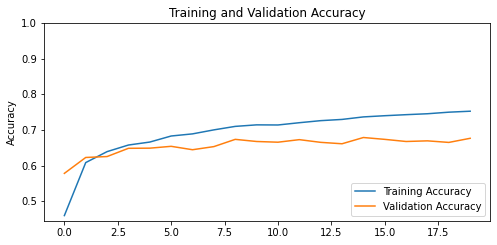

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

In [21]:
base_model.trainable = True

In [22]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 84)          967764    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 84)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 84)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)                7140      
Total params: 3,232,888
Trainable params: 2,837,496
Non-trainable params: 395,392
_________________________________________________________________


In [25]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 60


In [26]:
history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=20, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/20
675/675 [==============================] - 2992s 4s/step - loss: 1.6490 - accuracy: 0.6127 - val_loss: 1.5383 - val_accuracy: 0.6705
Epoch 2/20
675/675 [==============================] - 3005s 4s/step - loss: 1.2650 - accuracy: 0.6711 - val_loss: 1.4304 - val_accuracy: 0.6805
Epoch 3/20
675/675 [==============================] - 3047s 5s/step - loss: 1.1271 - accuracy: 0.7039 - val_loss: 1.3790 - val_accuracy: 0.6839
Epoch 4/20
675/675 [==============================] - 3050s 5s/step - loss: 1.0743 - accuracy: 0.7151 - val_loss: 1.3180 - val_accuracy: 0.6990
Epoch 5/20
675/675 [==============================] - 3070s 5s/step - loss: 0.9958 - accuracy: 0.7373 - val_loss: 1.2929 - val_accuracy: 0.6974
Epoch 6/20
675/675 [==============================] - 3060s 5s/step - loss: 0.9599 - accuracy: 0.7414 - val_loss: 1.2337 - val_accuracy: 0.7120
Epoch 7/20
675/675 [==============================] - 3060s 5s/step - loss: 0.8892 - accuracy: 0.7595 - val_loss: 1.2534 - val_accuracy:

In [27]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: save/fine_tuning\assets


In [ ]:
 # Randomly testing an image from the test set
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
imageno=np.random.random_integers(low=0, high=val_generator.samples)

name = val_generator.filepaths[imageno]
#name = "C:/Users/Rajat  Dungarwal/Desktop/Project/flower_photos1/cricket bat/bbb.jpeg"
print(name)
plt.imshow(mpimg.imread(name))

img = Image.open(val_generator.filepaths[imageno]).resize((224, 224))
probabilities = model.predict(preprocess_input(np.expand_dims(img, axis=0)))
breed_list = tuple(zip(val_generator.class_indices.values(), val_generator.class_indices.keys()))

for i in probabilities[0].argsort()[-5:][::-1]: 
    print(probabilities[0][i], "  :  " , breed_list[i])

In [30]:
model.save("api")

INFO:tensorflow:Assets written to: api\assets


INFO:tensorflow:Assets written to: api\assets


In [31]:
new_model = tf.keras.models.load_model("api")

In [32]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 84)          967764    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 84)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 84)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)                7140      
Total params: 3,232,888
Trainable params: 3,198,776
Non-trainable params: 34,112
_________________________________________________________________


In [33]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("api") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)